In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the dataset directly from the url

In [50]:
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(url)

### Always check the head of data to just get an idea of dataset

In [52]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting the dataset of hours of study against the marks obtained

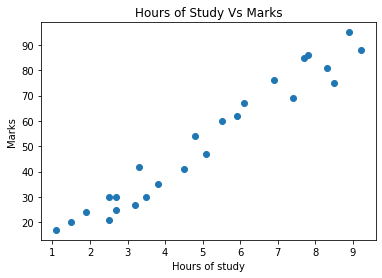

In [55]:
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.title('Hours of Study Vs Marks')
plt.xlabel('Hours of study')
plt.ylabel('Marks')
plt.show()

### Splitting the dataset 

In [29]:
X = dataset.drop(['Score'],axis=1)
y = dataset['Score']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=3)

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### Fitting our data to the model

In [58]:
lr.fit(X_train,y_train)

LinearRegression()

### Plotting the line of best fit

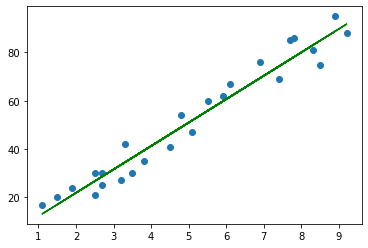

In [64]:
# Plotting the line of regression
line = lr.coef_*X+lr.intercept_

plt.scatter(X, y)
plt.plot(X, line,color='green');
plt.show()

### Prediction on testing dataset

In [59]:
prediction = lr.predict(X_test)

In [65]:
print("Train Score: ",lr.score(X_train,y_train))
print("Testing Score: ",lr.score(X_test,y_test))

Train Score:  0.9546368893376365
Testing Score:  0.9366028330496071


### Predicting on the actual test data we need

In [67]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = lr.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.20046719962541


### All the metrics to evaluate our model 

In [68]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, prediction)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R-2:', metrics.r2_score(y_test, prediction))

Mean Absolute Error: 5.047189916475587
Mean Squared Error: 27.03889170434258
Root Mean Squared Error: 5.19989343201787
R-2: 0.9366028330496071
